In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="", 
  port="3306",
  database="dump_dnw_aw"
)


print(mydb)

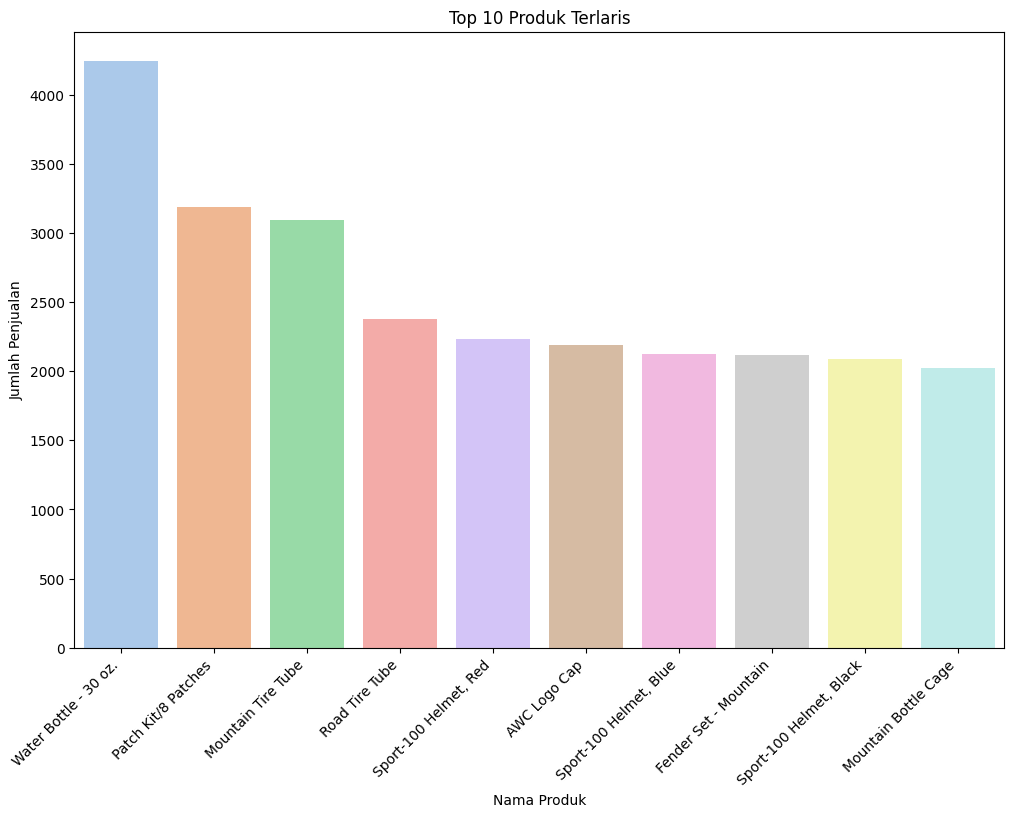

In [58]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat string koneksi SQLAlchemy
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'

# Membuat engine SQLAlchemy
db_connection = create_engine(db_connection_str)

# Query SQL untuk mendapatkan top 10 produk terlaris
query = """
SELECT 
    p.ProductKey,
    p.EnglishProductName,
    SUM(s.OrderQuantity) AS TotalSales
FROM 
    factinternetsales s
JOIN 
    dimproduct p ON s.ProductKey = p.ProductKey
GROUP BY 
    p.ProductKey, p.EnglishProductName
ORDER BY 
    TotalSales DESC
LIMIT 10;
"""

try:
    # Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Membuat bar chart menggunakan seaborn dengan gradasi warna pastel yang berbeda untuk setiap bar
    plt.figure(figsize=(12, 8))
    sns.barplot(x='EnglishProductName', y='TotalSales', data=data, hue='EnglishProductName', palette='pastel',dodge=False, legend=False)

    # Menambahkan judul ke plot
    plt.title("Top 10 Produk Terlaris")
    
    # Mengatur label X dan Y
    plt.xlabel('Nama Produk')
    plt.ylabel('Jumlah Penjualan')

    # Rotasi label x agar terlihat jelas
    plt.xticks(rotation=45, ha='right')

    # Menampilkan plot
    plt.show()
except Exception as e:
    print(str(e))


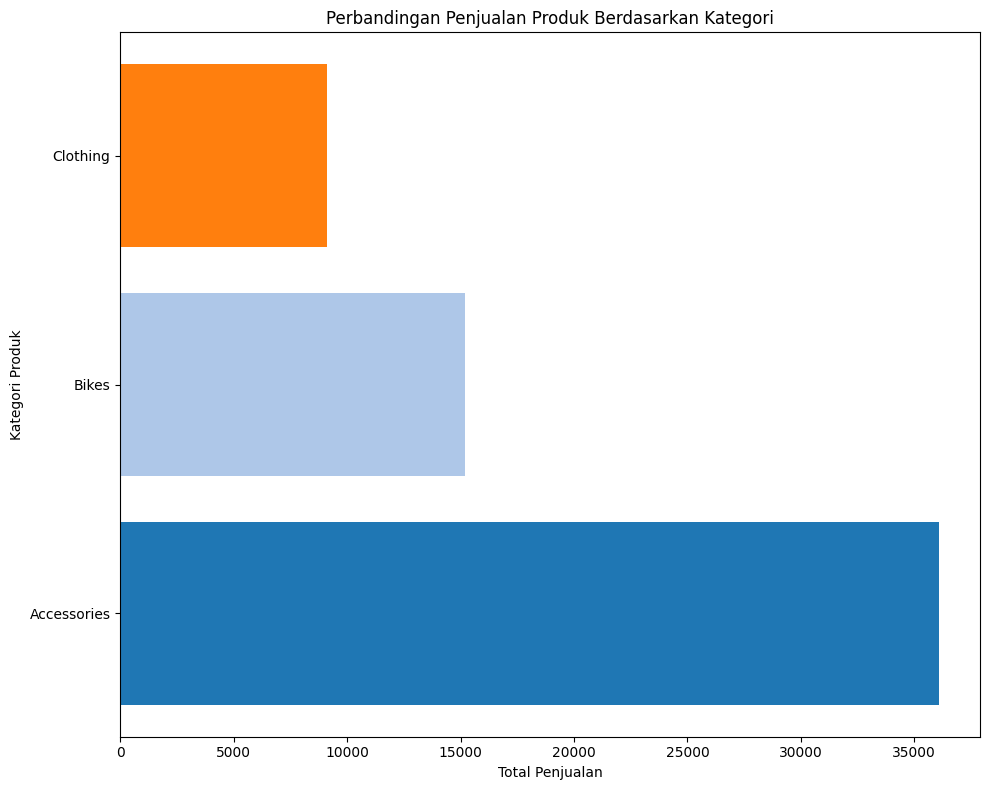

In [65]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk menggabungkan data dari tabel yang diperlukan
query = """
SELECT 
    pc.EnglishProductCategoryName,
    SUM(s.OrderQuantity) AS TotalSales
FROM 
    factinternetsales s
JOIN 
    dimproduct p ON s.ProductKey = p.ProductKey
JOIN 
    dimproductsubcategory psc ON p.ProductSubcategoryKey = psc.ProductSubcategoryKey
JOIN 
    dimproductcategory pc ON psc.ProductCategoryKey = pc.ProductCategoryKey
GROUP BY 
    pc.EnglishProductCategoryName
"""

try:
    # Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Membuat horizontal bar chart
    plt.figure(figsize=(10, 8))
    plt.barh(data['EnglishProductCategoryName'], data['TotalSales'], color=plt.cm.tab20.colors)

    # Menambahkan judul ke plot
    plt.title("Perbandingan Penjualan Produk Berdasarkan Kategori")

    # Menambahkan label pada sumbu-x dan sumbu-y
    plt.xlabel('Total Penjualan')
    plt.ylabel('Kategori Produk')

    # Menampilkan plot
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(str(e))


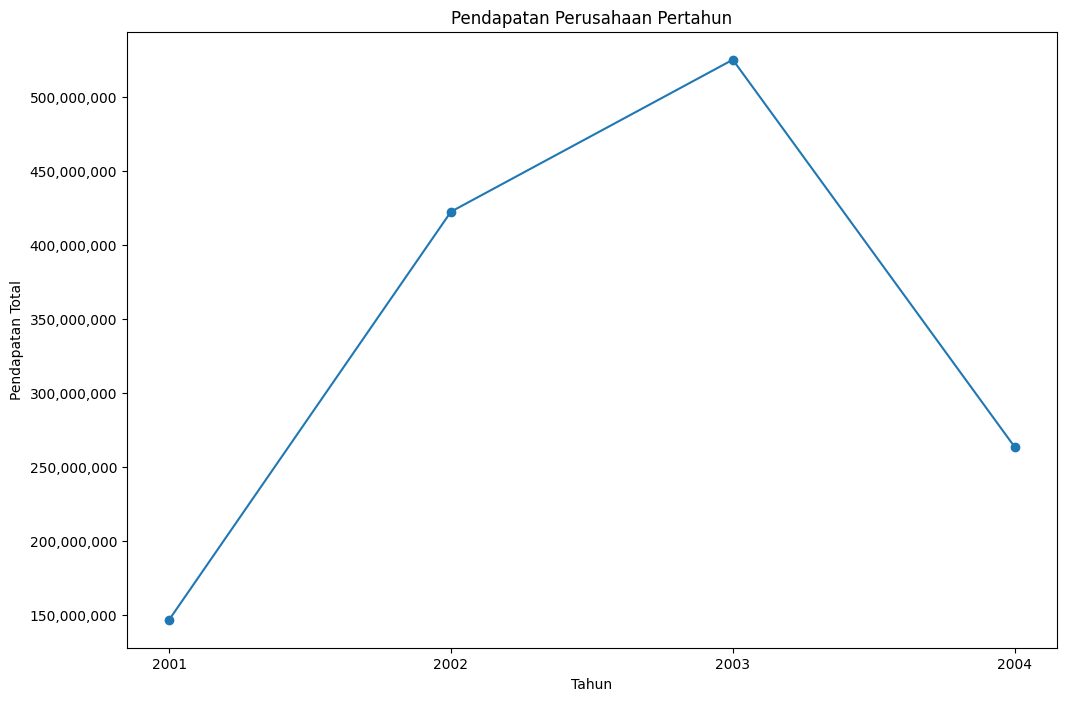

In [50]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk menggabungkan data dari tabel yang diperlukan
query = """
SELECT 
    t.CalendarYear,
    SUM(ff.Amount) AS TotalRevenue
FROM 
    dimtime t
JOIN 
    factfinance ff ON t.TimeKey = ff.TimeKey
GROUP BY 
    t.CalendarYear
ORDER BY 
    t.CalendarYear
"""

try:
    # Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Membuat line chart
    plt.figure(figsize=(12, 8))
    plt.plot(data['CalendarYear'], data['TotalRevenue'], marker='o', linestyle='-')

    # Menambahkan judul ke plot
    plt.title("Pendapatan Perusahaan Pertahun")
    # Nonaktifkan grid
    plt.grid(False)
    # Mengatur label X dan Y
    plt.xlabel('Tahun')
    plt.ylabel('Pendapatan Total')

    # Pemformatan angka pada sumbu y
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    # Menampilkan plot
    plt.grid(False)
    plt.show()
except Exception as e:
    print(str(e))


<Figure size 1200x800 with 0 Axes>

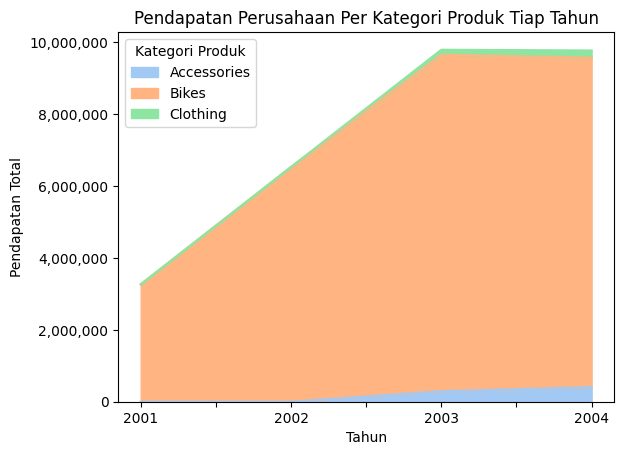

In [60]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import mplcursors

# Buat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk menggabungkan data dari tabel yang diperlukan
query = """
SELECT 
    t.CalendarYear,
    pc.EnglishProductCategoryName,
    SUM(fs.SalesAmount) AS TotalSales
FROM 
    dimtime t
JOIN 
    factinternetsales fs ON t.TimeKey = fs.OrderDateKey
JOIN 
    dimproduct p ON fs.ProductKey = p.ProductKey
JOIN 
    dimproductsubcategory psc ON p.ProductSubcategoryKey = psc.ProductSubcategoryKey
JOIN 
    dimproductcategory pc ON psc.ProductCategoryKey = pc.ProductCategoryKey
GROUP BY 
    t.CalendarYear, pc.EnglishProductCategoryName
ORDER BY 
    t.CalendarYear, pc.EnglishProductCategoryName
"""

try:
    # Baca hasil query ke dalam DataFrame menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Pivot data untuk mengubah dataframe menjadi bentuk yang sesuai untuk Stacked Area Chart
    data_pivot = data.pivot_table(index='CalendarYear', columns='EnglishProductCategoryName', values='TotalSales', aggfunc='sum', fill_value=0)

    # Buat Stacked Area Chart dengan warna gradasi biru pastel
    plt.figure(figsize=(12, 8))
    sns.set_palette("pastel")
    data_pivot.plot(kind='area', stacked=True)

    # Pemformatan angka pada sumbu y
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

    # Tambahkan judul ke plot
    plt.title("Pendapatan Perusahaan Per Kategori Produk Tiap Tahun")

    # Label sumbu x dan y
    plt.xlabel('Tahun')
    plt.ylabel('Pendapatan Total')

    # Tambahkan tooltip menggunakan mplcursors
    mplcursors.cursor(hover=True)

    # Tampilkan plot
    plt.grid(False)
    plt.legend(title='Kategori Produk', loc='upper left')
    plt.show()
except Exception as e:
    print(str(e))


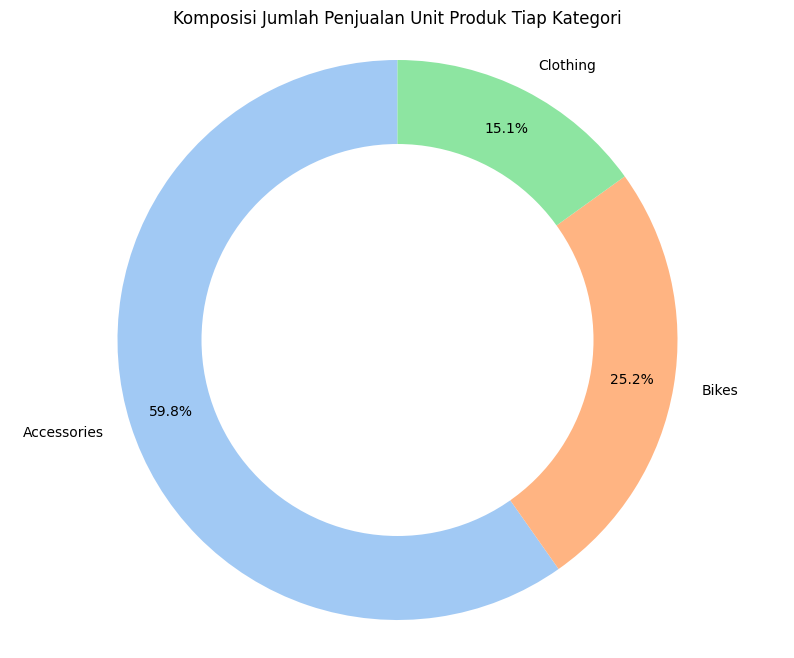

In [63]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Buat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk menggabungkan data dari tabel yang diperlukan
query = """
SELECT 
    pc.EnglishProductCategoryName,
    SUM(fs.OrderQuantity) AS TotalOrderQuantity
FROM 
    factinternetsales fs
JOIN 
    dimproduct p ON fs.ProductKey = p.ProductKey
JOIN 
    dimproductsubcategory psc ON p.ProductSubcategoryKey = psc.ProductSubcategoryKey
JOIN 
    dimproductcategory pc ON psc.ProductCategoryKey = pc.ProductCategoryKey
GROUP BY 
    pc.EnglishProductCategoryName
ORDER BY 
    TotalOrderQuantity DESC;
"""

try:
    # Baca hasil query ke dalam DataFrame menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Buat Donut Chart
    plt.figure(figsize=(10, 8))
    plt.pie(data['TotalOrderQuantity'], labels=data['EnglishProductCategoryName'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Tambahkan judul ke plot
    plt.title("Komposisi Jumlah Penjualan Unit Produk Tiap Kategori")

    # Tampilkan plot
    plt.axis('equal')
    plt.show()
except Exception as e:
    print(str(e))


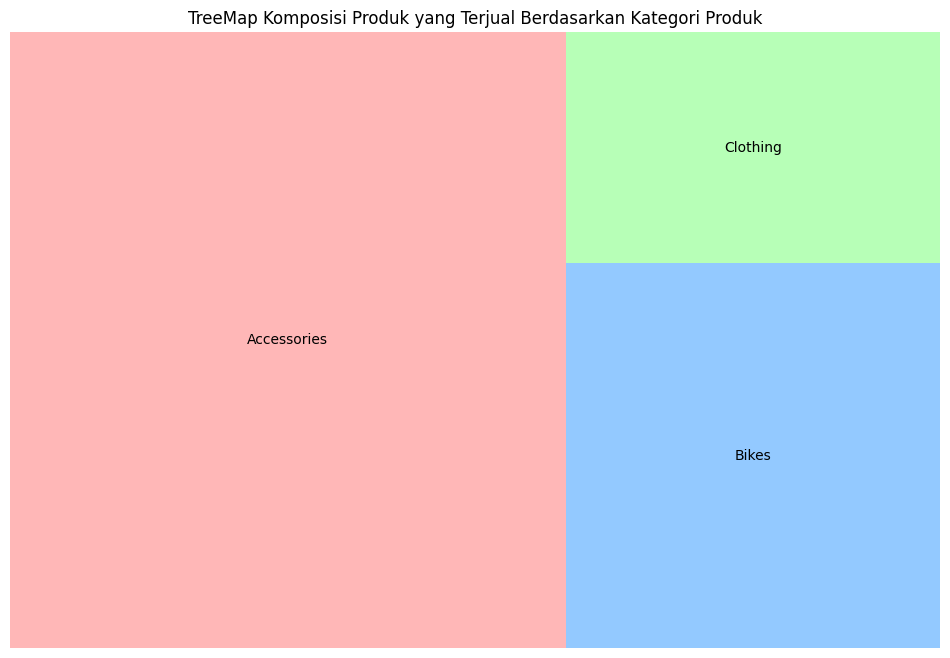

In [72]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk menggabungkan data dari tabel yang diperlukan
query = """
SELECT 
    pc.EnglishProductCategoryName AS Category,
    ps.EnglishProductSubcategoryName AS Subcategory,
    p.EnglishProductName AS Product,
    SUM(s.OrderQuantity) AS TotalSales
FROM 
    factinternetsales s
JOIN 
    dimproduct p ON s.ProductKey = p.ProductKey
JOIN 
    dimproductsubcategory ps ON p.ProductSubcategoryKey = ps.ProductSubcategoryKey
JOIN 
    dimproductcategory pc ON ps.ProductCategoryKey = pc.ProductCategoryKey
GROUP BY 
    pc.EnglishProductCategoryName, ps.EnglishProductSubcategoryName, p.EnglishProductName
"""

try:
    # Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Menghitung total penjualan per kategori produk
    total_sales_category = data.groupby('Category')['TotalSales'].sum()

    # Membuat TreeMap
    plt.figure(figsize=(12, 8))
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
    squarify.plot(sizes=total_sales_category, color=colors, label=total_sales_category.index, alpha=0.7)

    # Menambahkan judul ke plot
    plt.title("TreeMap Komposisi Produk yang Terjual Berdasarkan Kategori Produk")

    # Menghilangkan axis
    plt.axis('off')

    # Menampilkan plot
    plt.show()
except Exception as e:
    print(str(e))


C:\Users\ACER\AppData\Local\Temp\ipykernel_17412\924174243.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


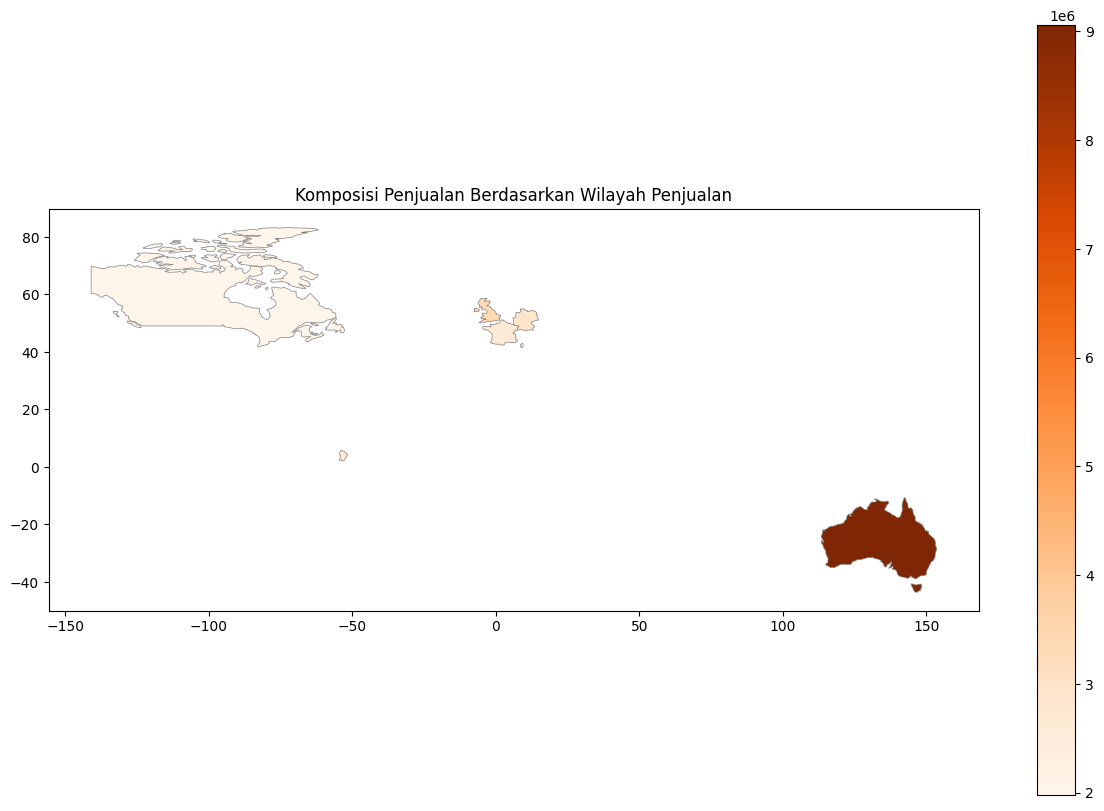

In [83]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Baca data penjualan dari factinternetsales dan data wilayah dari dimsalesterritory
sales_data = pd.read_sql("SELECT * FROM factinternetsales", db_connection)
territory_data = pd.read_sql("SELECT * FROM dimsalesterritory", db_connection)

# Gabungkan data penjualan dengan data wilayah berdasarkan SalesTerritoryKey
merged_data = pd.merge(sales_data, territory_data, on="SalesTerritoryKey")

# Hitung total penjualan untuk setiap wilayah
total_sales_per_region = merged_data.groupby(["SalesTerritoryRegion"]).agg({"SalesAmount": "sum"}).reset_index()

# Baca peta wilayah geografis
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Gabungkan data penjualan dengan peta wilayah geografis berdasarkan wilayah
world = world.merge(total_sales_per_region, how="left", left_on="name", right_on="SalesTerritoryRegion")

# Plot peta dengan warna berdasarkan total penjualan
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column="SalesAmount", ax=ax, legend=True, cmap="Oranges", edgecolor="grey", linewidth=0.5)
ax.set_title("Komposisi Penjualan Berdasarkan Wilayah Penjualan")

# Tampilkan plot
plt.show()


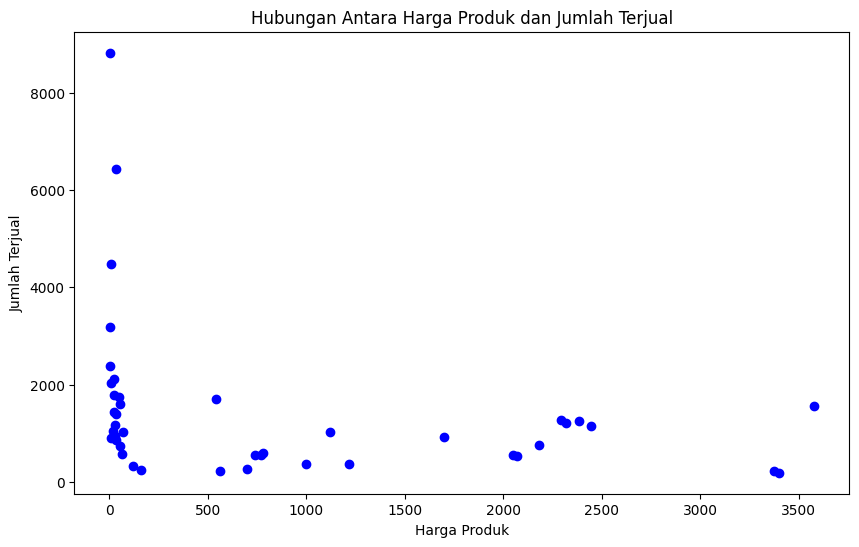

In [85]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data harga produk dan jumlah terjual
query = """
SELECT 
    p.ListPrice AS ProductPrice,
    SUM(s.OrderQuantity) AS UnitsSold
FROM 
    factinternetsales s
JOIN 
    dimproduct p ON s.ProductKey = p.ProductKey
GROUP BY 
    p.ListPrice
"""

try:
    # Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
    data = pd.read_sql(query, db_connection)

    # Membuat diagram scatter untuk hubungan antara harga produk dan jumlah terjual
    plt.figure(figsize=(10, 6))
    plt.scatter(data['ProductPrice'], data['UnitsSold'], color='blue')
    plt.title('Hubungan Antara Harga Produk dan Jumlah Terjual')
    plt.xlabel('Harga Produk')
    plt.ylabel('Jumlah Terjual')
    plt.grid(False)
    plt.show()

except Exception as e:
    print(str(e))


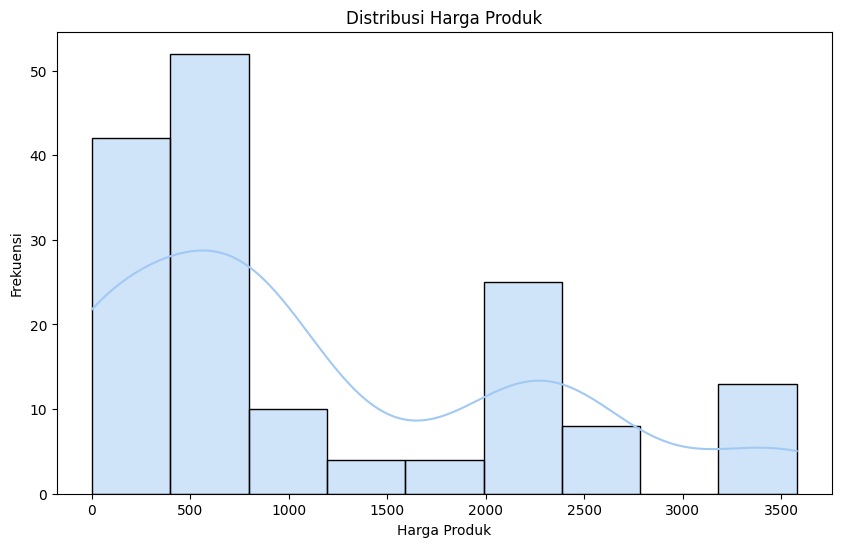

In [93]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data harga produk dari tabel dimproduct
query = """
SELECT 
    ListPrice
FROM 
    dimproduct
"""

# Membaca hasil query ke dalam DataFrame menggunakan SQLAlchemy engine
data_price = pd.read_sql(query, db_connection)

# Membuat histogram distribusi harga produk menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(x='ListPrice', data=data_price, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.grid(False)
plt.show()


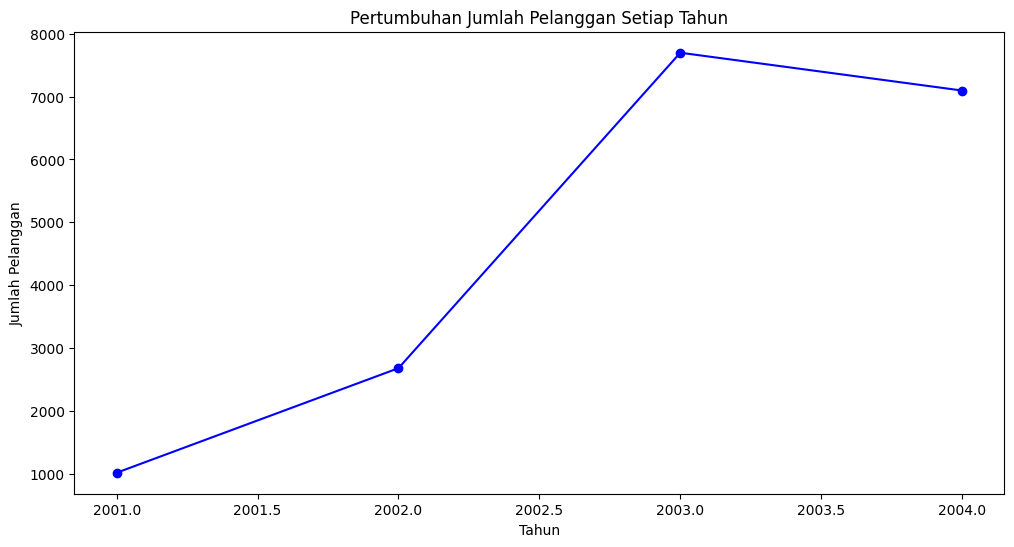

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data yang diperlukan
query = """
SELECT 
    YEAR(c.DateFirstPurchase) AS PurchaseYear,
    COUNT(c.CustomerKey) AS CustomerCount
FROM 
    dimcustomer c
WHERE 
    c.DateFirstPurchase IS NOT NULL
GROUP BY 
    PurchaseYear
"""


# Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
data = pd.read_sql(query, db_connection)

# Melakukan operasi groupby dan sum
customer_growth = data.groupby('PurchaseYear')['CustomerCount'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['PurchaseYear'], data['CustomerCount'], marker='o', color='b')

# Add title and axis labels
plt.title('Pertumbuhan Jumlah Pelanggan Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pelanggan')
plt.grid(False)

# Show plot
plt.show()



C:\Users\ACER\AppData\Local\Temp\ipykernel_17412\897868391.py:36: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


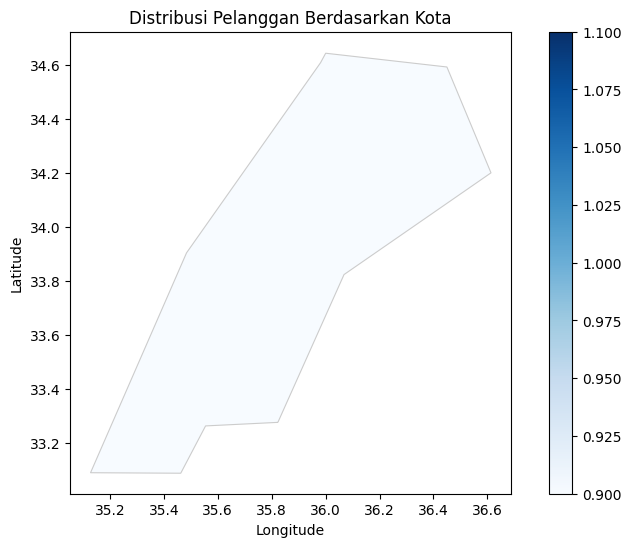

In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data yang diperlukan
query = """
SELECT 
    COUNT(c.CustomerKey) AS CustomerCount,
    g.City,
    g.StateProvinceName,
    g.CountryRegionCode,
    g.SalesTerritoryKey
FROM 
    dimcustomer c
JOIN 
    dimgeography g ON c.GeographyKey = g.GeographyKey
GROUP BY
    g.City,
    g.StateProvinceName,
    g.CountryRegionCode,
    g.SalesTerritoryKey
"""

# Membaca hasil query ke dalam dataframe menggunakan SQLAlchemy engine
data = pd.read_sql(query, db_connection)

# Membuat GeoDataFrame dari DataFrame dengan menggunakan kota sebagai geometri
customer_count_by_region = data.groupby(['City', 'StateProvinceName', 'CountryRegionCode', 'SalesTerritoryKey']).size().reset_index(name='CustomerCount')

# Mengambil data peta
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge data customer_count_by_region dengan data peta world
merged_data = world.merge(customer_count_by_region, how='left', left_on=['name'], right_on=['City'])

# Memplot peta
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='CustomerCount', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Distribusi Pelanggan Berdasarkan Kota')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


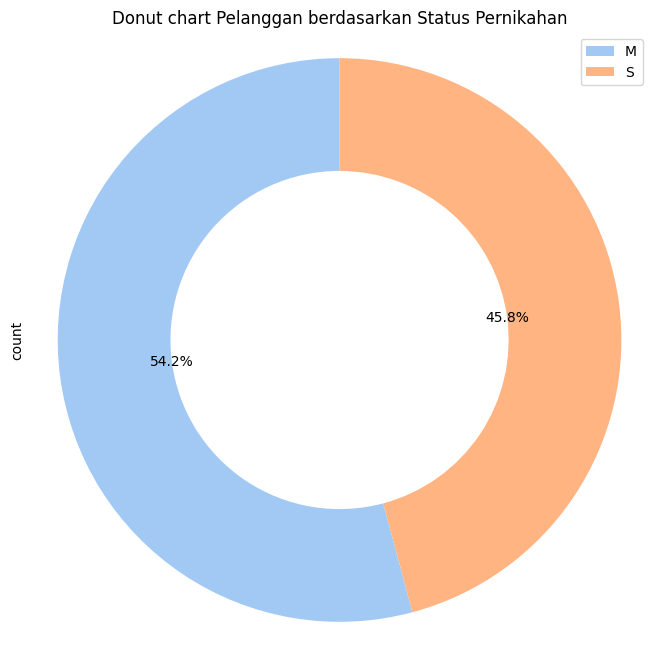

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data yang diperlukan
query = """
SELECT * FROM dimcustomer
"""

# Membaca data pelanggan dari database
customer_data = pd.read_sql(query, db_connection)

plt.figure(figsize=(8, 8))
customer_data['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), labels=None)
plt.title('Donut chart Pelanggan berdasarkan Status Pernikahan')
plt.legend(labels=customer_data['MaritalStatus'].value_counts().index, loc='best')
plt.axis('equal')
plt.show()

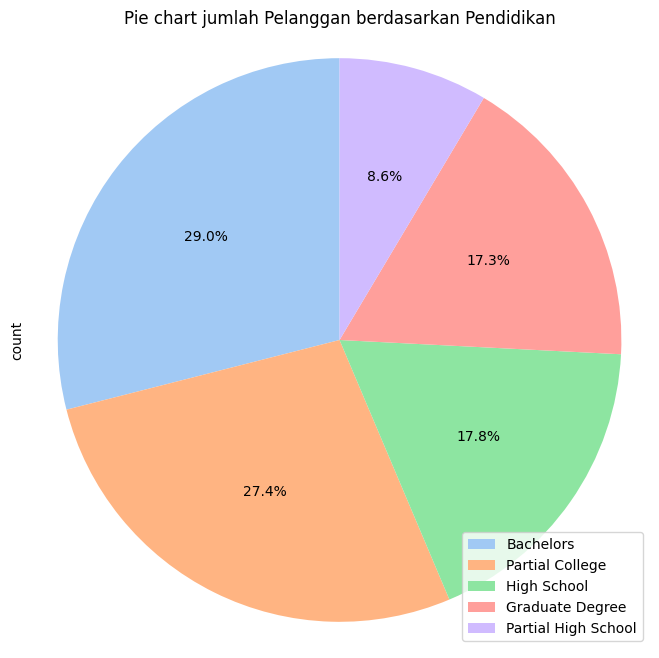

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data yang diperlukan
query = """
SELECT * FROM dimcustomer
"""

# Membaca data pelanggan dari database
customer_data = pd.read_sql(query, db_connection)

# Pie chart jumlah Pelanggan berdasarkan Pendidikan
plt.figure(figsize=(8, 8))
customer_data['EnglishEducation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=1), labels=None)
plt.title('Pie chart jumlah Pelanggan berdasarkan Pendidikan')
plt.legend(labels=customer_data['EnglishEducation'].value_counts().index, loc='best')
plt.axis('equal')
plt.show()


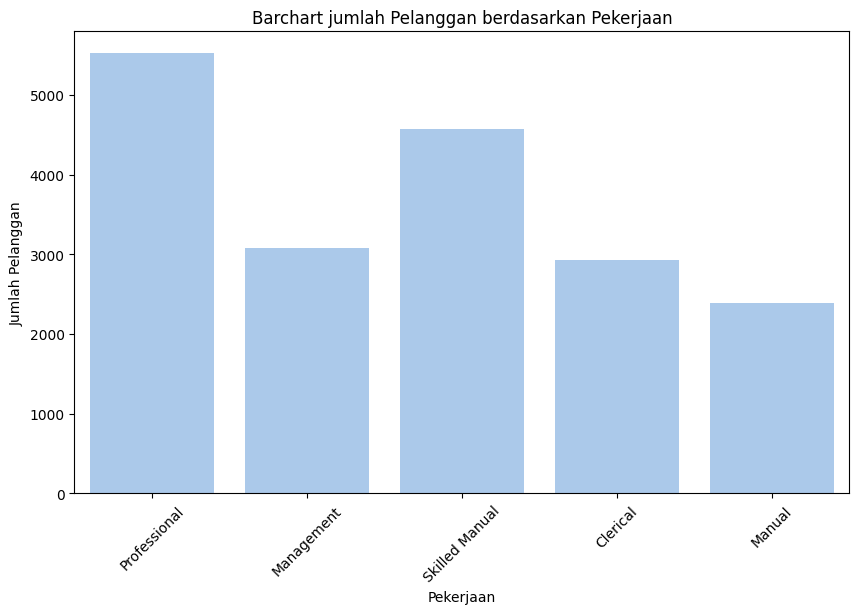

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data yang diperlukan
query = """
SELECT * FROM dimcustomer
"""

# Membaca data pelanggan dari database
customer_data = pd.read_sql(query, db_connection)

# Barchart jumlah Pelanggan berdasarkan Pekerjaan
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='EnglishOccupation')
plt.title('Barchart jumlah Pelanggan berdasarkan Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

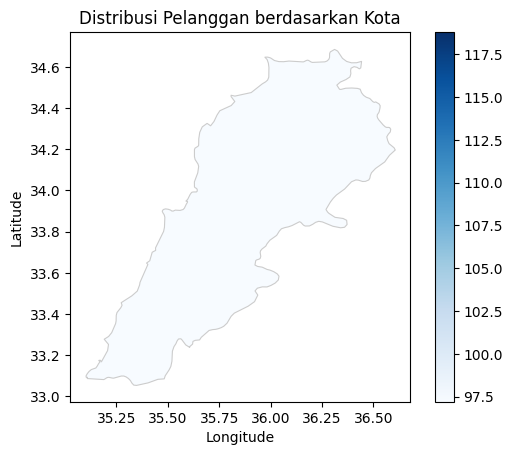

In [150]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Distribusi Pelanggan berdasarkan Kota
query_city = """
SELECT g.City as name , COUNT(c.CustomerKey) as CustomerCount
FROM dimcustomer c
JOIN dimgeography g ON c.GeographyKey = g.GeographyKey
GROUP BY g.City
"""
city_data = pd.read_sql(query_city, db_connection)

# Baca data spasial kota dari Natural Earth
city_map = gpd.read_file('D:\\Natural_Earth_quick_start\\packages\\Natural_Earth_quick_start\\10m_cultural\\ne_10m_admin_0_map_subunits.shp')


# Gabungkan data spasial kota dengan data jumlah pelanggan menggunakan merge
city_map = city_map.merge(city_data, left_on='ADMIN', right_on='name', how='left')

# Plot distribusi pelanggan berdasarkan kota
plt.figure(figsize=(12, 8))
city_map.plot(column='CustomerCount', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Distribusi Pelanggan berdasarkan Kota')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


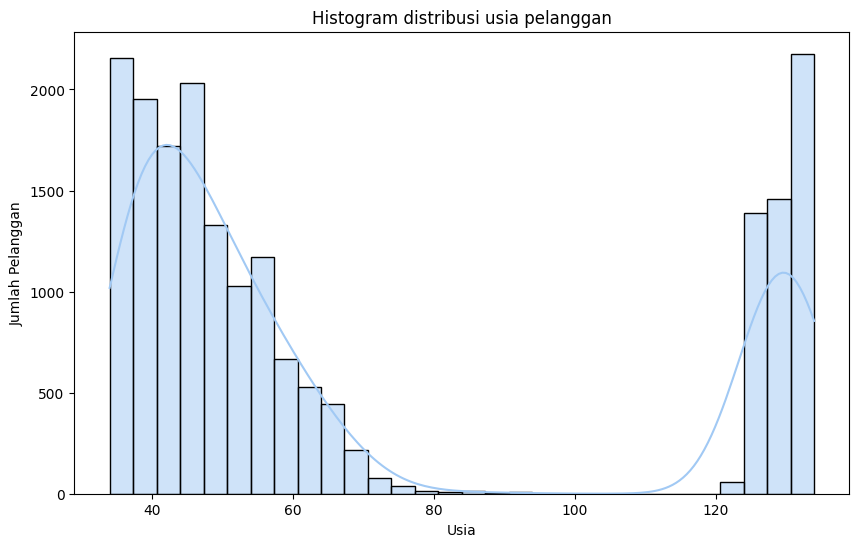

In [161]:
import pandas as pd
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query untuk mengambil tanggal terakhir dari FullDateAlternateKey
query_last_date = "SELECT MAX(FullDateAlternateKey) FROM dimtime"

# Mengambil tanggal terakhir dari FullDateAlternateKey
last_date = pd.read_sql(query_last_date, db_connection)['MAX(FullDateAlternateKey)'].iloc[0]

# Query untuk mengambil data pelanggan beserta tanggal lahir dari database
query_customer = "SELECT CustomerKey, BirthDate FROM dimcustomer"

# Membaca data pelanggan dari database
customer_data = pd.read_sql(query_customer, db_connection)

# Konversi BirthDate menjadi objek datetime
customer_data['BirthDate'] = pd.to_datetime(customer_data['BirthDate'])

# Hitung usia pelanggan berdasarkan tanggal lahir dan tanggal terakhir
customer_data['Age'] = (last_date - customer_data['BirthDate']).dt.days // 365

# Histogram distribusi usia pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_data, x='Age', bins=30, kde=True)
plt.title('Histogram distribusi usia pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.show()


<Figure size 1500x1000 with 0 Axes>

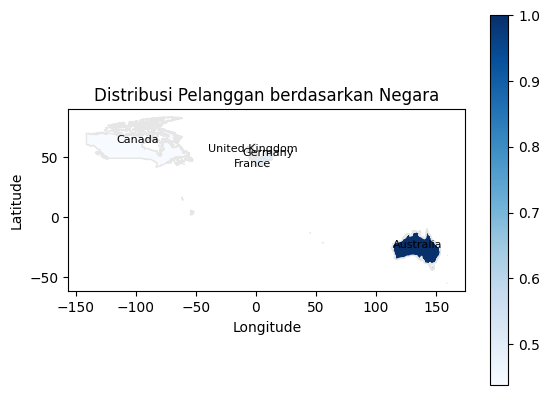

In [160]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Distribusi Pelanggan berdasarkan Negara
query_country = """
SELECT g.EnglishCountryRegionName as name , COUNT(c.CustomerKey) as CustomerCount
FROM dimcustomer c
JOIN dimgeography g ON c.GeographyKey = g.GeographyKey
GROUP BY g.EnglishCountryRegionName
"""
country_data = pd.read_sql(query_country, db_connection)

# Baca data spasial negara dari Natural Earth
country_map = gpd.read_file('D:\\Natural_Earth_quick_start\\packages\\Natural_Earth_quick_start\\10m_cultural\\ne_10m_admin_0_countries.shp')

# Gabungkan data spasial negara dengan data jumlah pelanggan menggunakan merge
country_map = country_map.merge(country_data, left_on='NAME', right_on='name', how='left')

# Normalisasi jumlah pelanggan untuk mengatur ukuran titik
country_map['CustomerCount'] = country_map['CustomerCount'] / country_map['CustomerCount'].max()

# Plot distribusi pelanggan berdasarkan negara
plt.figure(figsize=(15, 10))
country_map.plot(column='CustomerCount', cmap='Blues', edgecolor='0.9', legend=True)

# Tambahkan label teks untuk setiap negara dengan ukuran yang mencerminkan jumlah pelanggan
for idx, row in country_map.iterrows():
    if not pd.isnull(row['name']):  # Periksa apakah nilai name tidak NaN
        if row.geometry is not None:  # Periksa apakah geometri tidak kosong
            plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], fontsize=8, ha='center')

plt.title('Distribusi Pelanggan berdasarkan Negara')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



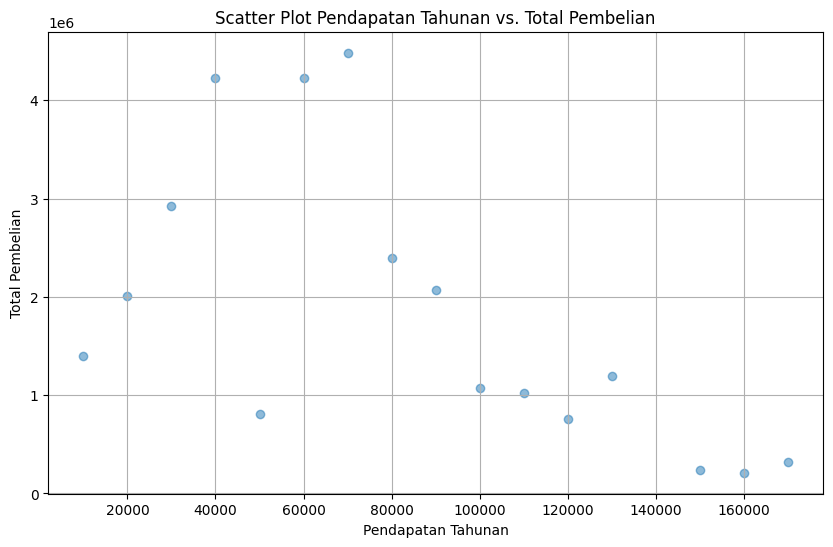

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query SQL untuk mengambil data
query = """
SELECT 
    c.YearlyIncome AS YearlyIncome,
    SUM(sales.SalesAmount) AS TotalSalesAmount
FROM 
    dimcustomer c
JOIN 
    factinternetsales sales ON c.CustomerKey = sales.CustomerKey
GROUP BY 
    c.YearlyIncome;
"""

# Mengambil data dari database dan memuatnya ke dalam DataFrame
df = pd.read_sql(query, db_connection)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['YearlyIncome'], df['TotalSalesAmount'], alpha=0.5)
plt.title('Scatter Plot Pendapatan Tahunan vs. Total Pembelian')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Total Pembelian')
plt.grid(True)
plt.show()


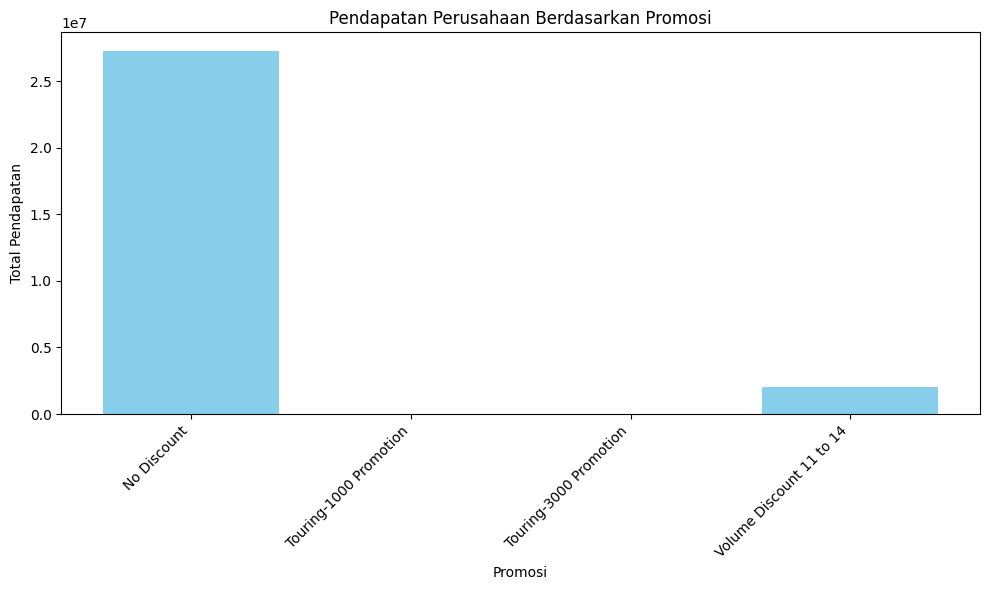

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query untuk mengambil data pendapatan perusahaan berdasarkan promosi
query = """
SELECT p.EnglishPromotionName, SUM(s.SalesAmount) AS TotalSales
FROM factinternetsales s
JOIN dimpromotion p ON s.PromotionKey = p.PromotionKey
GROUP BY p.EnglishPromotionName
"""

# Membaca data pendapatan perusahaan berdasarkan promosi dari database
promotion_sales_data = pd.read_sql(query, db_connection)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(promotion_sales_data['EnglishPromotionName'], promotion_sales_data['TotalSales'], color='skyblue')
plt.title('Pendapatan Perusahaan Berdasarkan Promosi')
plt.xlabel('Promosi')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


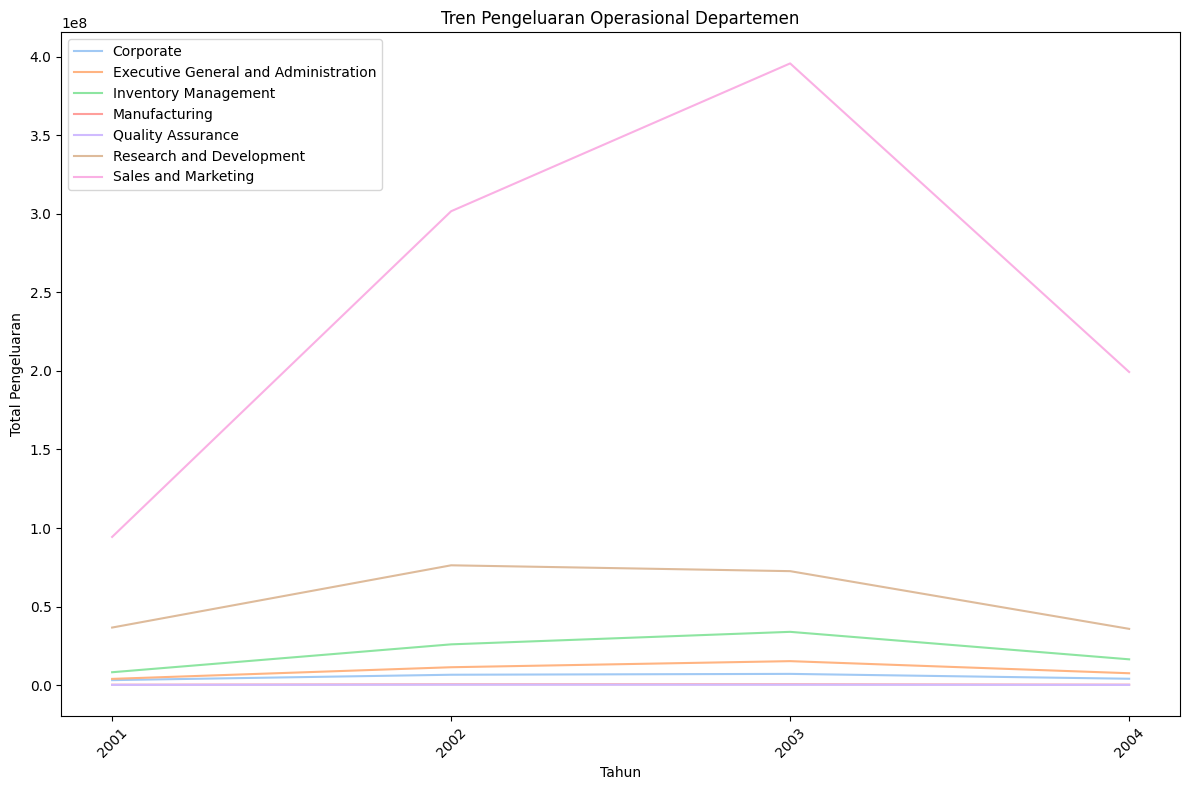

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query untuk mengambil data tren pengeluaran operasional departemen
query = """
SELECT t.CalendarYear, d.DepartmentGroupName, SUM(f.Amount) AS TotalAmount
FROM factfinance f
JOIN dimtime t ON f.TimeKey = t.TimeKey
JOIN dimdepartmentgroup d ON f.DepartmentGroupKey = d.DepartmentGroupKey
GROUP BY t.CalendarYear, d.DepartmentGroupName
"""

# Membaca data tren pengeluaran operasional departemen dari database
expense_data = pd.read_sql(query, db_connection)

# Membuat line chart
plt.figure(figsize=(12, 8))

# Iterasi setiap departemen dan plot garis trennya
for department, data in expense_data.groupby('DepartmentGroupName'):
    plt.plot(data['CalendarYear'], data['TotalAmount'], label=department)

plt.title('Tren Pengeluaran Operasional Departemen')
plt.xlabel('Tahun')
plt.ylabel('Total Pengeluaran')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


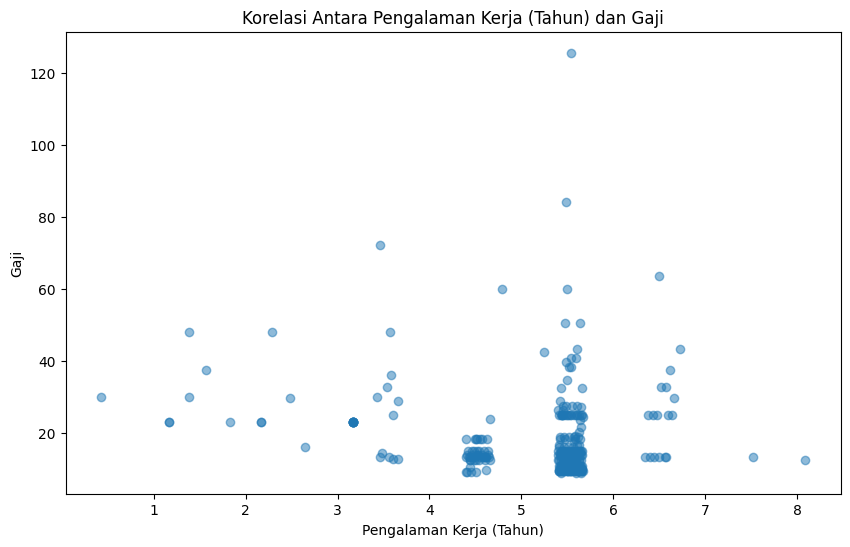

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query untuk mengambil data
query = """
SELECT 
    DATEDIFF(COALESCE(e.EndDate, last_date), e.HireDate) / 365 AS ExperienceYears, 
    e.BaseRate
FROM 
    dimemployee e
LEFT JOIN 
    (SELECT MAX(FullDateAlternateKey) AS last_date FROM dimtime) t ON e.EndDate IS NULL AND e.HireDate IS NOT NULL
"""

# Membaca data dari database
employee_data = pd.read_sql(query, db_connection)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(employee_data['ExperienceYears'], employee_data['BaseRate'], alpha=0.5)
plt.title('Korelasi Antara Pengalaman Kerja (Tahun) dan Gaji')
plt.xlabel('Pengalaman Kerja (Tahun)')
plt.ylabel('Gaji')
plt.grid(False)
plt.show()


Rata-rata Markup: 815.0506329113923


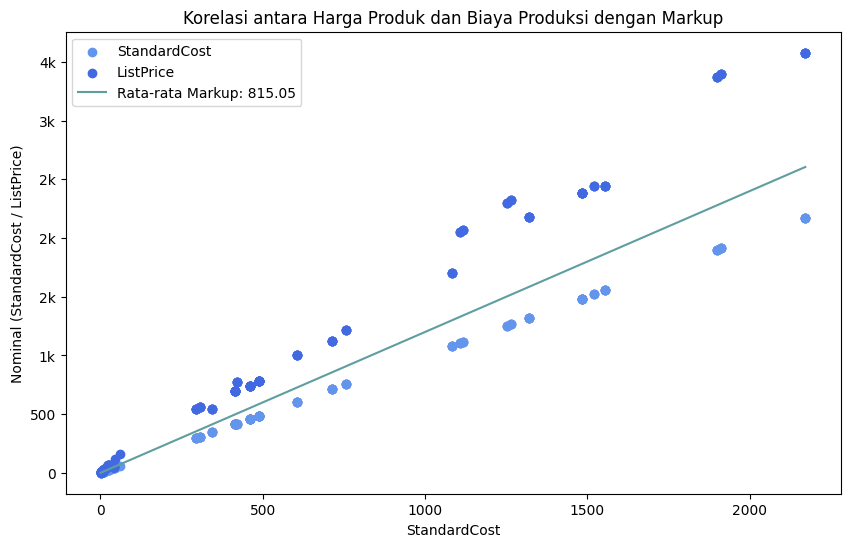

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Query untuk mengambil data
query = """
SELECT ProductKey, StandardCost, ListPrice
FROM dimproduct
ORDER BY StandardCost ASC
"""

# Membaca data dari database
product_data = pd.read_sql(query, db_connection)

# Menghitung markup
product_data['Markup'] = product_data['StandardCost'] * 1.2

# Menampilkan rata-rata markup
average_markup = product_data['Markup'].mean()

# Menampilkan rata-rata markup
print(f"Rata-rata Markup: {average_markup}")

# Fungsi formatter untuk mengubah satuan nominal
def format_nominal(value, tick_number):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}k'
    else:
        return f'{value:.0f}'

# Membuat scatter plot
plt.figure(figsize=(10, 6))

# Plot StandarCost
plt.scatter(product_data['StandardCost'], product_data['StandardCost'], color='cornflowerblue', label='StandardCost')

# Plot ListPrice
plt.scatter(product_data['StandardCost'], product_data['ListPrice'], color='royalblue', label='ListPrice')

# Plot garis markup rata-rata
plt.plot(product_data['StandardCost'], product_data['Markup'], color='cadetblue', linestyle='-', label=f'Rata-rata Markup: {average_markup:.2f}')

# Labeling dan judul
plt.title('Korelasi antara Harga Produk dan Biaya Produksi dengan Markup')
plt.xlabel('StandardCost')
plt.ylabel('Nominal (StandardCost / ListPrice)')
plt.legend()

# Menggunakan formatter untuk sumbu y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_nominal))

plt.grid(False)

# Tampilkan plot
plt.show()


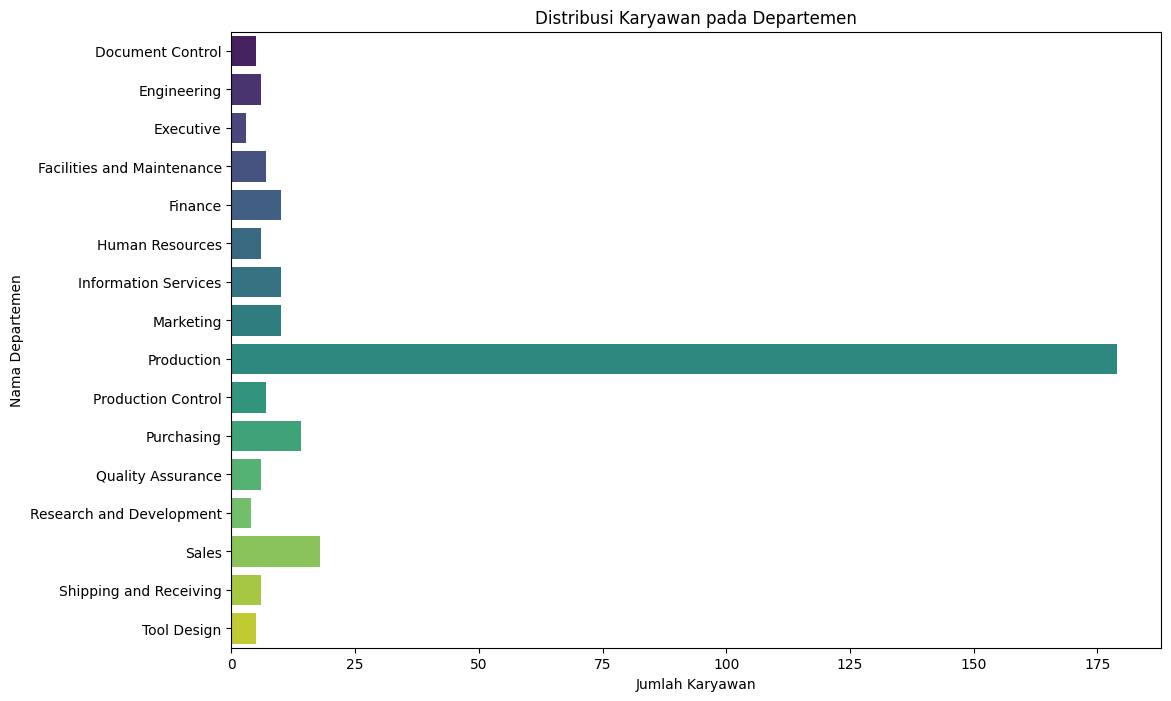

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

# Jalankan query SQL dan ambil data ke dalam DataFrame
query = """
SELECT 
    DepartmentName, 
    COUNT(EmployeeKey) AS EmployeeCount
FROM 
    dimemployee
GROUP BY 
    DepartmentName;
"""
df = pd.read_sql(query, db_connection)


# Plot menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='EmployeeCount', y='DepartmentName', hue='DepartmentName', palette='viridis', dodge=False, legend=False)
plt.title('Distribusi Karyawan pada Departemen')
plt.xlabel('Jumlah Karyawan')
plt.ylabel('Nama Departemen')
plt.show()


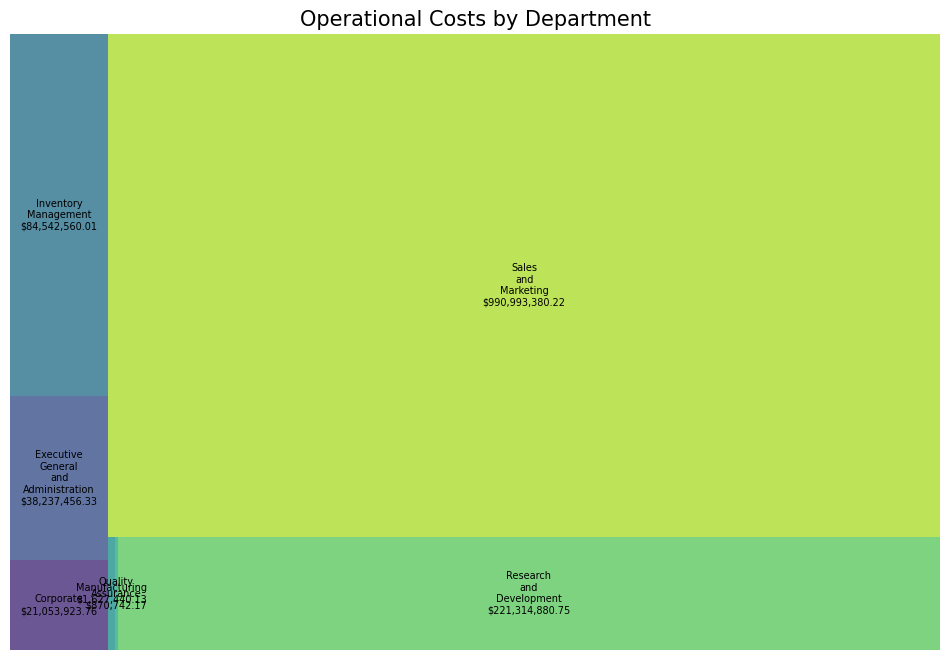

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import squarify

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

query = """
SELECT 
    ddg.DepartmentGroupName, 
    SUM(ff.Amount) AS TotalAmount
FROM 
    factfinance ff
JOIN 
    dimdepartmentgroup ddg ON ff.DepartmentGroupKey = ddg.DepartmentGroupKey
GROUP BY 
    ddg.DepartmentGroupName;
"""
df = pd.read_sql(query, db_connection)

# Buat label untuk TreeMap yang mengandung nama departemen dan jumlah pengeluaran
# Pisahkan nama departemen menjadi dua baris jika panjangnya lebih dari satu kata
labels = [f"{dept.replace(' ', '\n')}\n${amount:,.2f}" for dept, amount in zip(df['DepartmentGroupName'], df['TotalAmount'])]

# Plot TreeMap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df['TotalAmount'], label=labels, alpha=.8, color=sns.color_palette('viridis', len(df)), text_kwargs={'fontsize': 7})
plt.title('Operational Costs by Department', fontsize=15)
plt.axis('off')
plt.show()


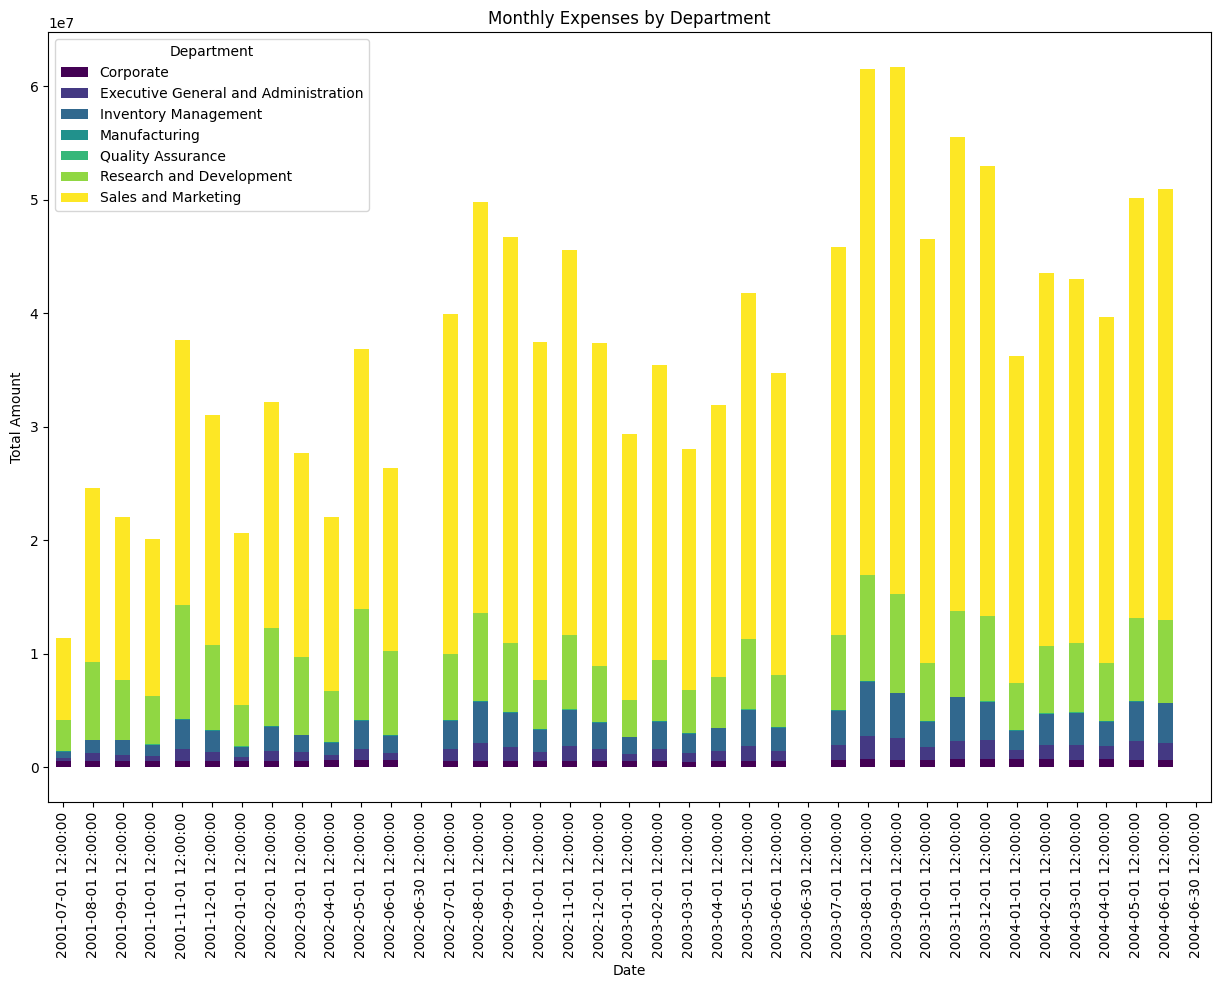

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import squarify

# Membuat koneksi ke database
db_connection_str = 'mysql+mysqlconnector://root:@localhost/dump_dnw_aw'
db_connection = create_engine(db_connection_str)

query = """
SELECT 
    ddg.DepartmentGroupName,
    dt.FullDateAlternateKey,
    SUM(ff.Amount) AS TotalAmount
FROM 
    factfinance ff
JOIN 
    dimdepartmentgroup ddg ON ff.DepartmentGroupKey = ddg.DepartmentGroupKey
JOIN 
    dimtime dt ON ff.TimeKey = dt.TimeKey
GROUP BY 
    ddg.DepartmentGroupName, dt.FullDateAlternateKey
ORDER BY 
    dt.FullDateAlternateKey;
"""
df = pd.read_sql(query, db_connection)

# Pivot the data
df_pivot = df.pivot(index='FullDateAlternateKey', columns='DepartmentGroupName', values='TotalAmount')

# Plot Stacked Bar Chart
df_pivot.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Monthly Expenses by Department')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend(title='Department')
plt.show()


In [26]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd
import re
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime

# Path to ChromeDriver
path = "C:\\Users\\ACER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"


# URL to be accessed 
my_url = "http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=2024,2024"

# IF YOU WANT TO DO HEADLESS BROWSER, use codes below
options = Options()
options.headless = False  # Change to True if you want to run the browser in headless mode
service = Service(path)

# THIS IS FOR NORMAL BROWSER SESSION (NOT HEADLESS)
# Define browser to get the first URL
browser = webdriver.Chrome(service=service, options=options) 

# Define browser to get the second/detail URL
browser2 = webdriver.Chrome(service=service, options=options)

Error waiting for movies to load: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF7B12C1F52+60322]
	(No symbol) [0x00007FF7B123CEC9]
	(No symbol) [0x00007FF7B10F7EBA]
	(No symbol) [0x00007FF7B1147676]
	(No symbol) [0x00007FF7B114773C]
	(No symbol) [0x00007FF7B118E967]
	(No symbol) [0x00007FF7B116C25F]
	(No symbol) [0x00007FF7B118BC80]
	(No symbol) [0x00007FF7B116BFC3]
	(No symbol) [0x00007FF7B1139617]
	(No symbol) [0x00007FF7B113A211]
	GetHandleVerifier [0x00007FF7B15D94AD+3301629]
	GetHandleVerifier [0x00007FF7B16236D3+3605283]
	GetHandleVerifier [0x00007FF7B1619450+3563680]
	GetHandleVerifier [0x00007FF7B1374326+790390]
	(No symbol) [0x00007FF7B124750F]
	(No symbol) [0x00007FF7B1243404]
	(No symbol) [0x00007FF7B1243592]
	(No symbol) [0x00007FF7B1232F9F]
	BaseThreadInitThunk [0x00007FF8DD18257D+29]
	RtlUserThreadStart [0x00007FF8DEB4AA48+40]



In [184]:
# Check file availability and content is not empty
filename = "imdb_primary_data.csv"
filename2 = "imdb_secondary_data.csv"

def visualize_data():
    print("Visualize Something")
    
if os.path.isfile(filename) and os.path.getsize(filename) > 0:   
    os.remove(filename)
    os.remove(filename2)

# Initialize file handlers outside try block
f = open(filename, "w")
fheaders = "Name,Year,Durasi(Menit),Rating\n"
f2 = open(filename2, "w")
f2headers = "Name,Budget,Gross_US,Opening_Week,Open_Week_Date,Gross_World\n"

f.write(fheaders)
f2.write(f2headers)

try:
    # Open session for first URL
    browser.get(my_url)
    
    # We are going to have 2 different actions for "browser"
    # 1. Looking for primary data for each movie in the LIST
    # 2. Looking for LIST of movies based on the search and links to detail page
    #    and then run "browser2" to get the page using the link and extract 
    #    additional data for each movie in the LIST

    # ACTION 1
    first_page = BeautifulSoup(browser.page_source ,'html.parser')
    movies = first_page.find_all("div", {"class":"sc-b189961a-0 hBZnfJ"})
    
    count2 = 0
    print("Primary Data")
    print("-----------------------------------")
    for movie in movies:
        count2 += 1
        menit = 0
        rating = "Not Rated"
        name = re.sub(r"\d+. ","", movie.find("h3", {"class": "ipc-title__text"}).text)
        detil_line = movie.findAll("span", {"class": "sc-b189961a-8 kLaxqf dli-title-metadata-item"})
        if len(detil_line) > 2:        
            year_movie = detil_line[0].text
            durasi = detil_line[1].text
            durasi = durasi.split(" ")
            if len(durasi) > 1:
                menit = int(durasi[0].replace("h","")) * 60 + int(durasi[1].replace("m",""))   
            else:
                menit = int(durasi[0].replace("h","")) * 60 
            rating = detil_line[2].text
        elif len(detil_line) > 1:
            year_movie = detil_line[0].text
            durasi = detil_line[1].text
            durasi = durasi.split(" ")
            if len(durasi) > 1:
                menit = int(durasi[0].replace("h","")) * 60 + int(durasi[1].replace("m",""))   
            else:
                menit = int(durasi[0].replace("h","")) * 60 
        else:
            year_movie = detil_line[0].text        
    
        print("-----------------------------------")
        print(name + "," + year_movie + "," + str(menit) + "," + rating)  
        f.write(name + "," + year_movie + "," + str(menit) + "," + rating + "\n")
    
    # ACTION 2
    links = browser.find_elements(By.XPATH, '//div[@class="sc-b189961a-0 hBZnfJ"]')

    count = 0
    print("-----------------------------------")
    print("-----------------------------------")
    print("SECONDARY DATA")
    print("panjang ", len(links))
    movie_titles = browser.find_elements(By.XPATH, '//h3[@class="ipc-title__text"]')
    
    for link in links:
        title = re.sub(r"\d+. ","", movie_titles[count].text)
        print("judul ke-" + str(count+1) + ": " + title)
        count += 1
        budget_num = 0
        gross_us_num = 0
        open_week_rev_num = 0
        open_week_date_std = "1900-01-01 00:00:00"
        gross_world_num = 0

        print("----------------------")
        print(count, link.find_element(By.CSS_SELECTOR, "a").get_attribute('href'), "\n")
        browser2.get(link.find_element(By.CSS_SELECTOR, "a").get_attribute('href'))

        # BOX OFFICE DATA ON THE 2ND URL
        det_page = browser2.page_source        
        container_rows = BeautifulSoup(det_page, "html.parser")        
        box_office_elements = container_rows.find("div",{"data-testid":"title-boxoffice-section"})
        if box_office_elements is not None:
            det_movie = box_office_elements.find_all("span",{"class":"ipc-metadata-list-item__list-content-item"})

            if len(det_movie) > 4:
                budget = det_movie[0].text
                gross_us = det_movie[1].text
                open_week_rev = det_movie[2].text
                open_week_date = det_movie[3].text            
                gross_world = det_movie[4].text

                print("budget = " + budget)
                print("gross_us = " + gross_us)
                print("opening_week_rev = " + open_week_rev)
                print("opening_week_date = " + open_week_date)
                print("gross_world = " + gross_world)

                print("=====================================")
                budget_num = int(re.sub("[A-Z£€₹$,()a-z]","",budget))
                gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_us))
                open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]","",open_week_rev))
                open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y")
                gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_world))

                print("Data has been formatted to standard")
                print("-----------------------------------")
                print("budget =", budget_num)
                print("gross_us =" , gross_us_num)
                print("opening_week_rev =" , open_week_rev_num)
                print("opening_week_date =", open_week_date_std)
                print("gross_world =", gross_world_num)

        f2.write(str(title) + "," + str(budget_num) + "," + str(gross_us_num) + "," + str(open_week_rev_num) + "," + str(open_week_date_std) + "," + str(gross_world_num) + "\n")
        
except Exception as E:
    print(E)
finally:
    f.close()
    f2.close()

Primary Data
-----------------------------------
-----------------------------------
Dune: Part Two,2024,166,PG-13
-----------------------------------
Road House,2024,121,R
-----------------------------------
The Beekeeper,2024,105,R
-----------------------------------
Civil War,2024,109,R
-----------------------------------
Damsel,2024,110,PG-13
-----------------------------------
The Fall Guy,2024,126,PG-13
-----------------------------------
Argylle,2024,139,PG-13
-----------------------------------
Godzilla x Kong: The New Empire,2024,115,PG-13
-----------------------------------
Madame Web,2024,116,PG-13
-----------------------------------
Furiosa: A Mad Max Saga,2024,148,R
-----------------------------------
Challengers,2024,131,R
-----------------------------------
Murder Mubarak,2024,140,TV-MA
-----------------------------------
Teri Baaton Mein Aisa Uljha Jiya,2024,141,Not Rated
-----------------------------------
Monkey Man,2024,121,R
-----------------------------------
Ghost

In [185]:
import pandas as pd
fn1 = 'imdb_primary_data.csv'
fn2 = 'imdb_secondary_data.csv'

fn3 = 'imdb_combined_data.csv'

if os.path.isfile(fn3) and os.path.getsize(fn3) > 0:      
    os.remove(fn3)
    
# Read CSV files into dataframes
df1 = pd.read_csv(fn1)
df2 = pd.read_csv(fn2)

merged = df1.merge(df2,on='Name')
merged.to_csv("imdb_combined_data.csv", index=False)

# Display the first few rows of the combined data
print(merged.head())

             Name  Year  Durasi(Menit) Rating     Budget   Gross_US  \
0  Dune: Part Two  2024            166  PG-13  190000000  282144358   
1      Road House  2024            121      R          0          0   
2   The Beekeeper  2024            105      R   40000000   66220535   
3       Civil War  2024            109      R   50000000   68432794   
4          Damsel  2024            110  PG-13          0          0   

   Opening_Week       Open_Week_Date  Gross_World  
0      82505391  2024-03-03 00:00:00    711844358  
1             0  1900-01-01 00:00:00            0  
2      16576007  2024-01-14 00:00:00    152720535  
3      25537368  2024-04-14 00:00:00    114097977  
4             0  1900-01-01 00:00:00            0  


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd

# Path to ChromeDriver
path = "C:\\Users\\ACER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"

# URL to be accessed
my_url = "https://www.imdb.com/what-to-watch/fan-favorites/?ref_=watch_tpks_tab"

# Setup ChromeDriver
options = Options()
options.headless = False  # Change to True if you want to run the browser in headless mode
service = Service(path)

# Define browser
browser = webdriver.Chrome(service=service, options=options)

# Open the URL
browser.get(my_url)

# Wait for the page to load
browser.implicitly_wait(10)

# Get the page source
page_source = browser.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, "html.parser")

# Find all poster cards
poster_cards = soup.find_all("div", class_="ipc-poster-card")

# Initialize lists to store movie titles and links
movie_titles = []
movie_links = []

# Loop through each poster card to extract title and link
for poster_card in poster_cards:
    # Extract title
    title_element = poster_card.find("a", class_="ipc-poster-card__title ipc-poster-card__title--clamp-2 ipc-poster-card__title--clickable")
    if title_element:
        title = title_element.text.strip()
        # Extract link
        link = "https://www.imdb.com" + title_element["href"]
        # Append title and link to lists
        movie_titles.append(title)
        movie_links.append(link)

# Close the browser
browser.quit()

# Create a DataFrame to store the data
df = pd.DataFrame({"Title": movie_titles, "Link": movie_links})

# Save the DataFrame to a CSV file
df.to_csv("imdb_fun_fav.csv", index=False)

print("Scraping completed and data saved to imdb_fun_fav.csv")


Scraping completed and data saved to imdb_fun_fav.csv


In [5]:
import time
import re
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract box office data from a movie detail page
def extract_box_office_data(movie_url):
    # Define browser
    browser = webdriver.Chrome(service=service, options=options)
    browser.get(movie_url)
    browser.implicitly_wait(10)
    page_source = browser.page_source
    soup = BeautifulSoup(page_source, "html.parser")
    
    # Extract box office data
    box_office_section = soup.find("section", {"data-testid": "BoxOffice"})
    if not box_office_section:
        return {"Budget": None, "Gross US & Canada": None, "Opening Weekend US & Canada": None, "Gross Worldwide": None}
    
    data = {}
    for item in box_office_section.find_all("li"):
        label_element = item.find("span", class_="ipc-metadata-list-item__label")
        value_element = item.find("span", class_="ipc-metadata-list-item__list-content-item")
        if label_element and value_element:
            label = label_element.text.strip()
            value = value_element.text.strip()
            data[label] = value
    
    return {
        "Budget": data.get("Budget"),
        "Gross US & Canada": data.get("Gross US & Canada"),
        "Opening Weekend US & Canada": data.get("Opening weekend US & Canada"),
        "Gross Worldwide": data.get("Gross worldwide")
    }

# Path to ChromeDriver
path ="C:\\Users\\ACER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"

# URL to be accessed
my_url = "https://www.imdb.com/what-to-watch/fan-favorites/?ref_=watch_tpks_tab"

# Setup ChromeDriver
options = Options()
options.headless = False  # Change to True if you want to run the browser in headless mode
service = Service(path)

# Define browser
browser = webdriver.Chrome(service=service, options=options)

# Open the URL
browser.get(my_url)

# Wait for the page to load
browser.implicitly_wait(10)

# Get the page source
page_source = browser.page_source

# Create BeautifulSoup object
soup = BeautifulSoup(page_source, "html.parser")

# Find all poster cards
poster_cards = soup.find_all("div", class_="ipc-poster-card")

# Initialize lists to store movie titles, links, and box office data
movie_data = []

# Loop through each poster card to extract title, link, and box office data
for poster_card in poster_cards:
    # Extract title
    title_element = poster_card.find("a", class_="ipc-poster-card__title ipc-poster-card__title--clamp-2 ipc-poster-card__title--clickable")
    if title_element:
        title = title_element.text.strip()
        # Extract link
        link = "https://www.imdb.com" + title_element["href"]
        # Extract box office data
        box_office_data = extract_box_office_data(link)
        # Clean numeric data
        budget = box_office_data["Budget"]
        gross_us = box_office_data["Gross US & Canada"]
        open_week_rev = box_office_data["Opening Weekend US & Canada"]
        gross_world = box_office_data["Gross Worldwide"]
        
        budget_num = int(re.sub("[A-Z£€₹$,()a-z]", "", budget)) if budget else None
        gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]", "", gross_us)) if gross_us else None
        open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]", "", open_week_rev)) if open_week_rev else None
        gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]", "", gross_world)) if gross_world else None
        
        # Append title, link, and box office data to list
        movie_data.append({
            "Title": title,
            "Link": link,
            "Budget": budget_num,
            "Gross US & Canada": gross_us_num,
            "Opening Weekend US & Canada": open_week_rev_num,
            "Gross Worldwide": gross_world_num
        })
    time.sleep(2)  # To avoid overloading the server

# Close the browser
browser.quit()

# Create a DataFrame to store the data
df = pd.DataFrame(movie_data)

# Save the DataFrame to a CSV file
df.to_csv("imdb_fun_fav.csv", index=False)

print("Scraping completed and data saved to imdb_fun_fav.csv")

# Read the CSV file into a DataFrame
df = pd.read_csv('imdb_fun_fav.csv')

Scraping completed and data saved to imdb_fun_fav.csv


In [ ]:
import re
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from datetime import datetime
import time

def extract_movie_details(movie_url, options, service):
    try:
        browser = webdriver.Chrome(service=service, options=options)
        browser.get(movie_url)
        browser.implicitly_wait(10)
        page_source = browser.page_source
        soup = BeautifulSoup(page_source, "html.parser")

        box_office_data = {
            "Budget": None, 
            "Gross US & Canada": None, 
            "Opening Weekend US & Canada": None, 
            "Opening Weekend Date": None, 
            "Gross Worldwide": None
        }
        
        box_office_section = soup.find("section", {"data-testid": "BoxOffice"})
        if box_office_section:
            for item in box_office_section.find_all("li"):
                label_element = item.find("span", class_="ipc-metadata-list-item__label")
                value_element = item.find("span", class_="ipc-metadata-list-item__list-content-item")
                if label_element and value_element:
                    label = label_element.text.strip()
                    value = value_element.text.strip()
                    if label == "Opening weekend US & Canada":
                        box_office_data["Opening Weekend US & Canada"] = value.split()[0]  # Get the revenue part
                        date_element = item.find_all("span", class_="ipc-metadata-list-item__list-content-item")[1]
                        if date_element:
                            box_office_data["Opening Weekend Date"] = date_element.text.strip()
                    elif label == "Gross worldwide":
                        box_office_data["Gross Worldwide"] = value
                    else:
                        box_office_data[label] = value

        runtime = None
        color = None
        sound_mix = None
        aspect_ratio = None

        techspec_section = soup.find("section", {"data-testid": "TechSpecs"})
        if techspec_section:
            for item in techspec_section.find_all("li", class_="ipc-metadata-list__item"):
                label_element = item.find("span", class_="ipc-metadata-list-item__label")
                if label_element:
                    label = label_element.text.strip()
                    if label == "Runtime":
                        runtime_element = item.find("div", class_="ipc-metadata-list-item__content-container")
                        if runtime_element:
                            runtime = runtime_element.text.strip()
                    elif label == "Color":
                        color_element = item.find("a", class_="ipc-metadata-list-item__list-content-item")
                        if color_element:
                            color = color_element.text.strip()
                    elif label == "Sound mix":
                        sound_mix_element = item.find("a", class_="ipc-metadata-list-item__list-content-item")
                        if sound_mix_element:
                            sound_mix = sound_mix_element.text.strip()
                    elif label == "Aspect ratio":
                        aspect_ratio_element = item.find("span", class_="ipc-metadata-list-item__list-content-item")
                        if aspect_ratio_element:
                            aspect_ratio = aspect_ratio_element.text.strip()

        budget = box_office_data["Budget"]
        gross_us = box_office_data["Gross US & Canada"]
        open_week_rev = box_office_data["Opening Weekend US & Canada"]
        open_week_date = box_office_data["Opening Weekend Date"]
        gross_world = box_office_data["Gross Worldwide"]

        budget_num = int(re.sub("[A-Z£€₹$,()a-z]", "", budget)) if budget else None
        gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]", "", gross_us)) if gross_us else None
        open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]", "", open_week_rev).replace(",", "")) if open_week_rev else None
        open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y") if open_week_date else None
        gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]", "", gross_world).replace(",", "")) if gross_world else None
        
        browser.quit()
        
        return {
            "Budget": budget_num,
            "Gross US & Canada": gross_us_num,
            "Opening Weekend US & Canada": open_week_rev_num,
            "Opening Weekend Date": open_week_date_std,
            "Gross Worldwide": gross_world_num,
            "Runtime": runtime,
            "Color": color,
            "Sound mix": sound_mix,
            "Aspect ratio": aspect_ratio
        }
    except Exception as e:
        print(f"Error extracting movie details from {movie_url}: {e}")
        return None

path = "C:\\Users\\ACER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"
my_url = "https://www.imdb.com/what-to-watch/fan-favorites/?ref_=watch_tpks_tab"

try:
    options = Options()
    options.headless = True
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    service = Service(path)
    
    browser = webdriver.Chrome(service=service, options=options)
    browser.get(my_url)
    browser.implicitly_wait(10)
    page_source = browser.page_source

    soup = BeautifulSoup(page_source, "html.parser")
    poster_cards = soup.find_all("div", class_="ipc-poster-card")

    for poster_card in poster_cards:
        title_element = poster_card.find("a", class_="ipc-poster-card__title ipc-poster-card__title--clamp-2 ipc-poster-card__title--clickable")
        if title_element:
            title = title_element.text.strip()
            link = "https://www.imdb.com" + title_element["href"]
            movie_details = extract_movie_details(link, options, service)
            if movie_details:
                print(f"Extracted data for {title}: {movie_details}")
                df = pd.DataFrame([{
                    "Title": title,
                    "Link": link,
                    "Budget": movie_details["Budget"],
                    "Gross US & Canada": movie_details["Gross US & Canada"],
                    "Opening Weekend US & Canada": movie_details["Opening Weekend US & Canada"],
                    "Opening Weekend Date": movie_details["Opening Weekend Date"],
                    "Gross Worldwide": movie_details["Gross Worldwide"],
                    "Runtime": movie_details["Runtime"],
                    "Color": movie_details["Color"],
                    "Sound mix": movie_details["Sound mix"],
                    "Aspect ratio": movie_details["Aspect ratio"]
                }])
                if os.path.exists("imdb_fun_fav.csv"):
                    df.to_csv("imdb_fun_fav.csv", mode='a', header=False, index=False)
                else:
                    df.to_csv("imdb_fun_fav.csv", index=False)
        time.sleep(2)  # Delay to avoid overloading the server

    browser.quit()
    print("Scraping completed and data saved to imdb_fun_fav.csv")

except Exception as e:
    print(f"Error during scraping: {e}")

Extracted data for Hit Man: {'Budget': None, 'Gross US & Canada': None, 'Opening Weekend US & Canada': None, 'Opening Weekend Date': None, 'Gross Worldwide': 1139025, 'Runtime': '1 hour 55 minutes', 'Color': 'Color', 'Sound mix': 'Dolby Digital', 'Aspect ratio': '2.39:1'}
Extracted data for Furiosa: A Mad Max Saga: {'Budget': 168000000, 'Gross US & Canada': 58670014, 'Opening Weekend US & Canada': 26326462, 'Opening Weekend Date': datetime.datetime(2024, 5, 26, 0, 0), 'Gross Worldwide': 144670014, 'Runtime': '2 hours 28 minutes', 'Color': 'Color', 'Sound mix': 'IMAX 6-Track', 'Aspect ratio': '2.39 : 1'}
Extracted data for Godzilla Minus One: {'Budget': None, 'Gross US & Canada': None, 'Opening Weekend US & Canada': None, 'Opening Weekend Date': None, 'Gross Worldwide': None, 'Runtime': None, 'Color': None, 'Sound mix': None, 'Aspect ratio': None}
Extracted data for The Fall Guy: {'Budget': 130000000, 'Gross US & Canada': 85014265, 'Opening Weekend US & Canada': 27747035, 'Opening Weeke

In [1]:
import re
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
from datetime import datetime
import time

def extract_movie_details(movie_url, options, service):
    try:
        browser = webdriver.Chrome(service=service, options=options)
        browser.get(movie_url)
        browser.implicitly_wait(10)
        page_source = browser.page_source
        soup = BeautifulSoup(page_source, "html.parser")

        box_office_data = {
            "Budget": None, 
            "Gross US & Canada": None, 
            "Opening Weekend US & Canada": None, 
            "Opening Weekend Date": None, 
            "Gross Worldwide": None
        }
        
        box_office_section = soup.find("section", {"data-testid": "BoxOffice"})
        if box_office_section:
            for item in box_office_section.find_all("li"):
                label_element = item.find("span", class_="ipc-metadata-list-item__label")
                value_element = item.find("span", class_="ipc-metadata-list-item__list-content-item")
                if label_element and value_element:
                    label = label_element.text.strip()
                    value = value_element.text.strip()
                    if label == "Opening weekend US & Canada":
                        box_office_data["Opening Weekend US & Canada"] = value.split()[0]  # Get the revenue part
                        date_element = item.find_all("span", class_="ipc-metadata-list-item__list-content-item")[1]
                        if date_element:
                            box_office_data["Opening Weekend Date"] = date_element.text.strip()
                    elif label == "Gross worldwide":
                        box_office_data["Gross Worldwide"] = value
                    else:
                        box_office_data[label] = value

        runtime = None
        color = None
        sound_mix = None
        aspect_ratio = None

        techspec_section = soup.find("section", {"data-testid": "TechSpecs"})
        if techspec_section:
            for item in techspec_section.find_all("li", class_="ipc-metadata-list__item"):
                label_element = item.find("span", class_="ipc-metadata-list-item__label")
                if label_element:
                    label = label_element.text.strip()
                    if label == "Runtime":
                        runtime_element = item.find("div", class_="ipc-metadata-list-item__content-container")
                        if runtime_element:
                            runtime = runtime_element.text.strip()
                    elif label == "Color":
                        color_element = item.find("a", class_="ipc-metadata-list-item__list-content-item")
                        if color_element:
                            color = color_element.text.strip()
                    elif label == "Sound mix":
                        sound_mix_element = item.find("a", class_="ipc-metadata-list-item__list-content-item")
                        if sound_mix_element:
                            sound_mix = sound_mix_element.text.strip()
                    elif label == "Aspect ratio":
                        aspect_ratio_element = item.find("span", class_="ipc-metadata-list-item__list-content-item")
                        if aspect_ratio_element:
                            aspect_ratio = aspect_ratio_element.text.strip()

        budget = box_office_data["Budget"]
        gross_us = box_office_data["Gross US & Canada"]
        open_week_rev = box_office_data["Opening Weekend US & Canada"]
        open_week_date = box_office_data["Opening Weekend Date"]
        gross_world = box_office_data["Gross Worldwide"]

        budget_num = int(re.sub("[A-Z£€₹$,()a-z]", "", budget)) if budget else None
        gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]", "", gross_us)) if gross_us else None
        open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]", "", open_week_rev).replace(",", "")) if open_week_rev else None
        open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y") if open_week_date else None
        gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]", "", gross_world).replace(",", "")) if gross_world else None
        
        
        
        return {
            "Budget": budget_num,
            "Gross US & Canada": gross_us_num,
            "Opening Weekend US & Canada": open_week_rev_num,
            "Opening Weekend Date": open_week_date_std,
            "Gross Worldwide": gross_world_num,
            "Runtime": runtime,
            "Color": color,
            "Sound mix": sound_mix,
            "Aspect ratio": aspect_ratio
        }
    except Exception as e:
        print(f"Error extracting movie details from {movie_url}: {e}")
        return None

path = "C:\\Users\\ACER\\Downloads\\chromedriver-win64\\chromedriver-win64\\chromedriver.exe"
my_url = "https://www.imdb.com/what-to-watch/fan-favorites/?ref_=watch_tpks_tab"

try:
    options = Options()
    options.headless = True
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    service = Service(path)
    
    browser = webdriver.Chrome(service=service, options=options)
    browser.get(my_url)
    browser.implicitly_wait(10)
    page_source = browser.page_source

    soup = BeautifulSoup(page_source, "html.parser")
    poster_cards = soup.find_all("div", class_="ipc-poster-card")

    count = 0  # To keep track of the number of entries
    for poster_card in poster_cards:
        if count >= 25:
            break  # Limit reached, exit loop
        title_element = poster_card.find("a", class_="ipc-poster-card__title ipc-poster-card__title--clamp-2 ipc-poster-card__title--clickable")
        if title_element:
            title = title_element.text.strip()
            link = "https://www.imdb.com" + title_element["href"]
            movie_details = extract_movie_details(link, options, service)
            if movie_details:
                print(f"Extracted data for {title}: {movie_details}")
                df = pd.DataFrame([{
                    "Title": title,
                    "Link": link,
                    "Budget": movie_details["Budget"],
                    "Gross US & Canada": movie_details["Gross US & Canada"],
                    "Opening Weekend US & Canada": movie_details["Opening Weekend US & Canada"],
                    "Opening Weekend Date": movie_details["Opening Weekend Date"],
                    "Gross Worldwide": movie_details["Gross Worldwide"],
                    "Runtime": movie_details["Runtime"],
                    "Color": movie_details["Color"],
                    "Sound mix": movie_details["Sound mix"],
                    "Aspect ratio": movie_details["Aspect ratio"]
                }])
                if os.path.exists("imdb_fun_fav.csv"):
                    df.to_csv("imdb_fun_fav.csv", mode='a', header=False, index=False)
                else:
                    df.to_csv("imdb_fun_fav.csv", index=False)
                count += 1  # Increment count
        time.sleep(2)  # Delay to avoid overloading the server

    browser.quit()
    print("Scraping completed and data saved to imdb_fun_fav.csv")

except Exception as e:
    print(f"Error during scraping: {e}")


Extracted data for Hit Man: {'Budget': None, 'Gross US & Canada': None, 'Opening Weekend US & Canada': None, 'Opening Weekend Date': None, 'Gross Worldwide': 1139025, 'Runtime': '1 hour 55 minutes', 'Color': 'Color', 'Sound mix': 'Dolby Digital', 'Aspect ratio': '2.39:1'}
Extracted data for Furiosa: A Mad Max Saga: {'Budget': 168000000, 'Gross US & Canada': 58670014, 'Opening Weekend US & Canada': 26326462, 'Opening Weekend Date': datetime.datetime(2024, 5, 26, 0, 0), 'Gross Worldwide': 144670014, 'Runtime': '2 hours 28 minutes', 'Color': 'Color', 'Sound mix': 'IMAX 6-Track', 'Aspect ratio': '2.39 : 1'}
Extracted data for Godzilla Minus One: {'Budget': 15000000, 'Gross US & Canada': 56418793, 'Opening Weekend US & Canada': 11419975, 'Opening Weekend Date': datetime.datetime(2023, 12, 3, 0, 0), 'Gross Worldwide': 115857413, 'Runtime': '2 hours 4 minutes', 'Color': 'Color', 'Sound mix': 'Dolby Atmos', 'Aspect ratio': '2.39 : 1'}
Extracted data for The Fall Guy: {'Budget': 130000000, 'Gro